# Importando as bibliotecas necessarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Lendo o dataset

In [2]:
df = pd.read_csv('dataset/diabetes_data.csv')
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(70692, 18)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [5]:
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

In [6]:
X.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
dtype: int64

In [7]:
y.isna().sum()

0

In [8]:
corr = df.corr()
corr

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
Age,1.000000,-0.002315,0.240338,0.101743,-0.038648,0.105424,0.221878,-0.100753,0.061096,-0.018893,-0.057705,0.155624,-0.101746,0.084852,0.195265,0.123879,0.338132,0.278738
Sex,-0.002315,1.000000,0.017324,-0.007991,0.000827,0.112125,0.098161,0.051753,-0.088723,-0.052604,0.014164,-0.014555,-0.089204,-0.045957,-0.082248,0.003822,0.040819,0.044413
HighChol,0.240338,0.017324,1.000000,0.085981,0.131309,0.093398,0.181187,-0.090453,-0.047384,-0.042836,-0.025443,0.237778,0.083881,0.142610,0.162043,0.099786,0.316515,0.289213
CholCheck,0.101743,-0.007991,0.085981,1.000000,0.045648,-0.004331,0.043497,-0.008249,0.017384,0.000349,-0.027146,0.059213,-0.010660,0.034540,0.044430,0.022529,0.103283,0.115382
BMI,-0.038648,0.000827,0.131309,0.045648,1.000000,0.011551,0.060355,-0.170936,-0.084505,-0.056528,-0.058232,0.267888,0.104682,0.161862,0.246094,0.022931,0.241019,0.293373
Smoker,0.105424,0.112125,0.093398,-0.004331,0.011551,1.000000,0.124418,-0.079823,-0.074811,-0.029926,0.077835,0.152416,0.091257,0.120698,0.119789,0.064658,0.087438,0.085999
HeartDiseaseorAttack,0.221878,0.098161,0.181187,0.043497,0.060355,0.124418,1.000000,-0.098223,-0.019436,-0.036315,-0.037130,0.275868,0.075057,0.198416,0.232611,0.223394,0.210750,0.211523
PhysActivity,-0.100753,0.051753,-0.090453,-0.008249,-0.170936,-0.079823,-0.098223,1.000000,0.133813,0.149322,0.019111,-0.273548,-0.130090,-0.234500,-0.276868,-0.079985,-0.136102,-0.158666
Fruits,0.061096,-0.088723,-0.047384,0.017384,-0.084505,-0.074811,-0.019436,0.133813,1.000000,0.238605,-0.033246,-0.098687,-0.062102,-0.048572,-0.050784,-0.008996,-0.040852,-0.054077
Veggies,-0.018893,-0.052604,-0.042836,0.000349,-0.056528,-0.029926,-0.036315,0.149322,0.238605,1.000000,0.022090,-0.115795,-0.052359,-0.066896,-0.084072,-0.047601,-0.066624,-0.079293


In [9]:
corr.loc['Diabetes'].sort_values(ascending=False)


Diabetes                1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Stroke                  0.125427
CholCheck               0.115382
MentHlth                0.087029
Smoker                  0.085999
Sex                     0.044413
Fruits                 -0.054077
Veggies                -0.079293
HvyAlcoholConsump      -0.094853
PhysActivity           -0.158666
Name: Diabetes, dtype: float64

<AxesSubplot: xlabel='Age', ylabel='count'>

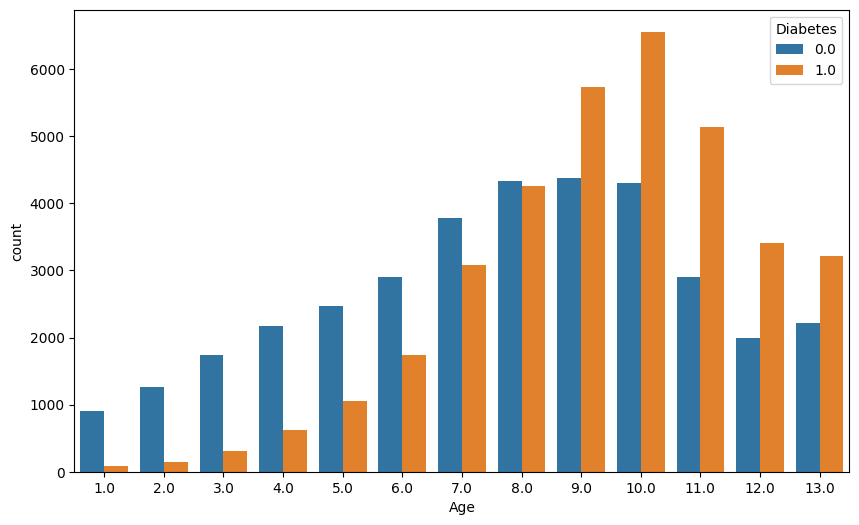

In [9]:
#plotting age vs diabetes
plt.figure(figsize=(10,6))
sns.countplot(x='Age', hue='Diabetes', data=df)
#Age has a strong correlation with diabetes


<AxesSubplot: xlabel='Sex', ylabel='count'>

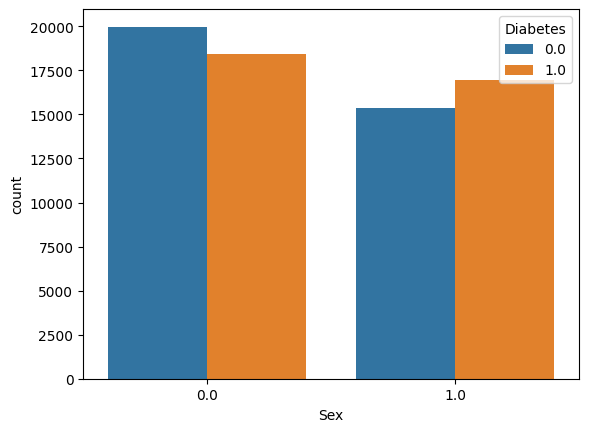

In [10]:
plt.figsize=(10,6)

sns.countplot(x='Sex',hue='Diabetes', data=df)
#Sex has weak correlation with diabetes 

<AxesSubplot: xlabel='HighChol', ylabel='count'>

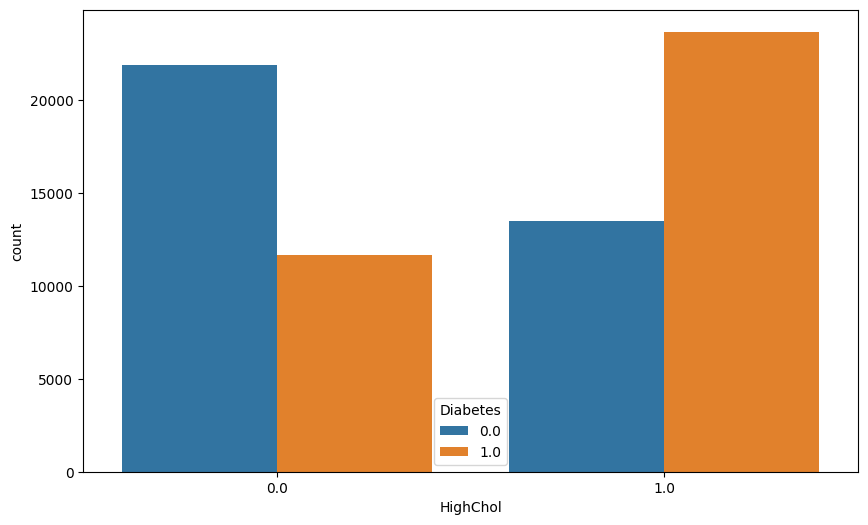

In [11]:
#plotting highcol vs diabetes
plt.figure(figsize=(10,6))
sns.countplot(x=df.HighChol, hue=df.Diabetes)



In [17]:
#select best features from the X dataframe to predict y
features = ['GenHlth','HighChol', 'BMI','HighBP','Age','DiffWalk','PhysHlth','HeartDiseaseorAttack']
X = df[features]
y = df['Diabetes']
           

In [18]:
#create a model to predict diabetes using randomized search cv
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)







In [19]:
#with knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
#find the best parameters
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = RandomizedSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)
#predict the test data
y_pred = knn_gscv.predict(X_test)
#check the accuracy of the model
print('Accuracy: ', accuracy_score(y_test, y_pred))
#check the confusion matrix
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
#check the classification report
print('Classification Report: ', classification_report(y_test, y_pred))


Accuracy:  0.7301082113303629
Confusion Matrix:  [[4910 2180]
 [1636 5413]]
Classification Report:                precision    recall  f1-score   support

         0.0       0.75      0.69      0.72      7090
         1.0       0.71      0.77      0.74      7049

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139



In [20]:
#with logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
#find the best parameters
param_grid = {'C': np.logspace(-4, 4, 20), 'solver': ['liblinear']}
lr_gscv = RandomizedSearchCV(lr, param_grid, cv=5)
lr_gscv.fit(X_train, y_train)
#predict the test data
y_pred = lr_gscv.predict(X_test)
#check the accuracy of the model
print('Accuracy: ', accuracy_score(y_test, y_pred))
#check the confusion matrix
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
#check the classification report
print('Classification Report: ', classification_report(y_test, y_pred))


Accuracy:  0.7442534832732159
Confusion Matrix:  [[5118 1972]
 [1644 5405]]
Classification Report:                precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      7090
         1.0       0.73      0.77      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139

